<a href="https://colab.research.google.com/github/AchmadAinunNaim/Semester5_PCVK/blob/main/Minggu5/TugasPraktikum05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


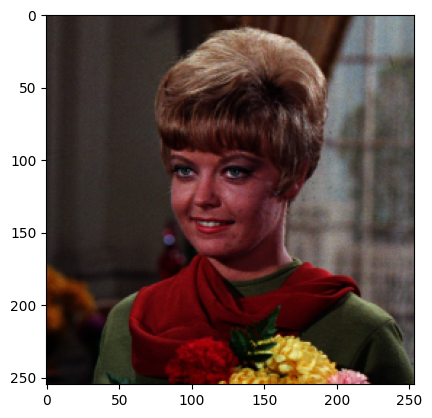

In [8]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

img = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/Minggu05/female.tiff')
img_rgb = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img_rgb)

### **MEMBUAT GAMMA CORRECTION**

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


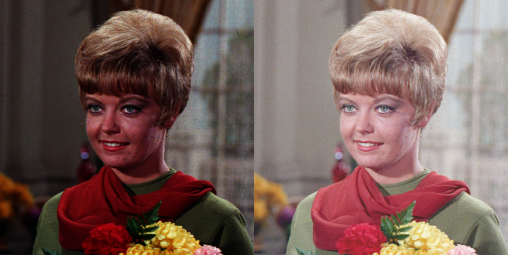

In [9]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.cvtColor(img_rgb,cv.COLOR_BGR2RGB)
gamma_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
     gamma_image[y,x,c] = np.clip(255 * pow(original[y,x,c] / 255, (1 / gamma)), 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

### **MEMBUAT SIMULASI IMAGE DEPTH**

STATIS

 Bit Depth pada Citra
---------------------------------


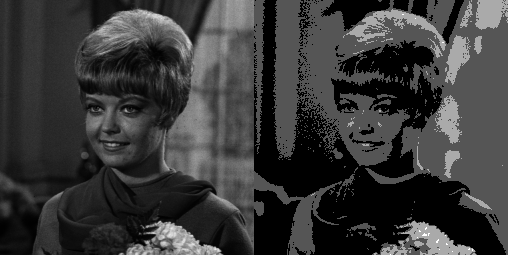

In [10]:
print(' Bit Depth pada Citra')
print('---------------------------------')

bit_depth=2
level = 255 / (pow(2,bit_depth)-1)
original = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/Minggu05/female.tiff', cv.IMREAD_GRAYSCALE)

bit_depth_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
       bit_depth_image[y,x] = np.clip(round(original[y,x] / level) * level, 0, 255)

final_frame = cv.hconcat((original, bit_depth_image))
cv2_imshow(final_frame)

DINAMIS

 Bit Depth pada Citra
---------------------------------
Masukkan nilai bit depth: 3


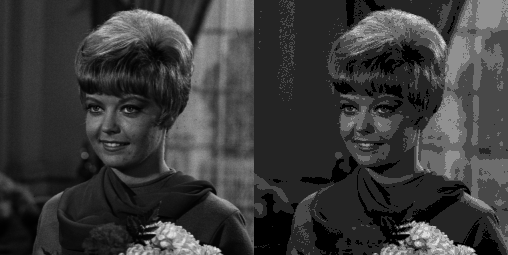

In [5]:
print(' Bit Depth pada Citra')
print('---------------------------------')

try:
  bd = float(input('Masukkan nilai bit depth: '))
except ValueError:
  print('Error, not a number')

bit_depth = 2**bd
level = 255 / (bit_depth - 1)



original = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/Minggu05/female.tiff', cv.IMREAD_GRAYSCALE)

bit_depth_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
       bit_depth_image[y,x] = np.clip(round(original[y,x] / level) * level, 0, 255)

final_frame = cv.hconcat((original, bit_depth_image))
cv2_imshow(final_frame)

###  MEMBUAT MODUL AVERAGE DENOISING

JUMLAH CITRA AVERAGE (5,30,60,80,100)

Average Denoising Pada Citra
-------------------------------
Masukkan nilai 5,30,60,80,100: 100


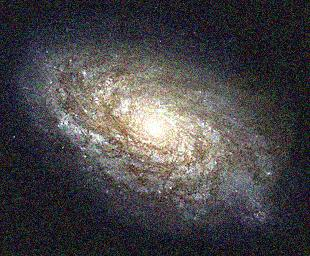

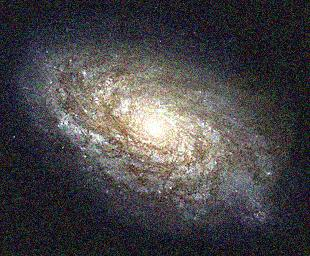

PSNR antara gambar asli dan hasil average denoising: inf dB


In [31]:
print('Average Denoising Pada Citra')
print('-------------------------------')

import glob

def psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr_value = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr_value


try:
    avg = float(input('Masukkan nilai 5,30,60,80,100: '))
except ValueError:
    print('Error, not a number')
    avg = 100  # Set gamma ke nilai default jika ada kesalahan input

# Jumlah gambar yang ingin dimuat
desired_num_images = avg

# Buat list untuk menyimpan semua gambar
cv_img = []

# Membaca gambar dari direktori
for i, img_path in enumerate(glob.glob('/content/drive/MyDrive/Colab Notebooks/PCVK/Minggu05/*.jpg')):
    n = cv.imread(img_path)
    if n is not None:  # Periksa apakah gambar berhasil dibaca
        cv_img.append(n)

    # Hentikan proses setelah mencapai jumlah gambar yang diinginkan
    if len(cv_img) >= desired_num_images:
        break

# Periksa berapa jumlah gambar yang berhasil dibaca
num_images = len(cv_img)

if num_images == 0:
    print("Tidak ada gambar yang berhasil dibaca.")
else:
    # Menghitung rata-rata dari gambar yang berhasil dibaca
    average_image = np.mean(cv_img, axis=0).astype(np.uint8)

    # Menampilkan salah satu gambar asli dan gambar hasil average denoising
    cv2_imshow(cv_img[0])  # Menampilkan salah satu gambar asli
    cv2_imshow(average_image)

    # Menghitung PSNR antara gambar asli dan gambar hasil average denoising
    psnr_value = psnr(cv_img[0], average_image)
    print(f"PSNR antara gambar asli dan hasil average denoising: {psnr_value:.2f} dB")

    cv.waitKey(0)
    cv.destroyAllWindows()

IMAGE MASKING

resolusi image : height x width  240  x  243


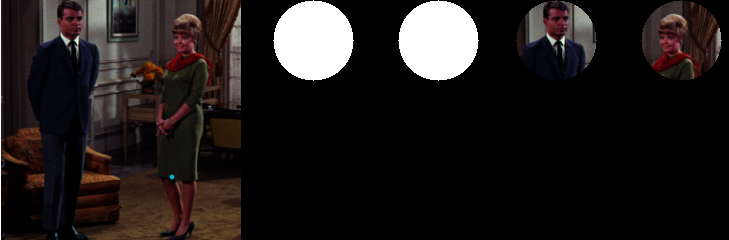

In [12]:
img_couple = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/Minggu05/GAMBAR01.png')

height = img_couple.shape[0]
width = img_couple.shape[1]
print("resolusi image : height x width ", height, " x ",width)

mask = np.zeros(img_couple.shape, img_couple.dtype)
mask = cv.circle(mask, (70, 40), 40, (255,255,255), -1)

result = img_couple & mask

mask1 = cv.circle(mask, (195, 40), 40, (255,255,255), -1)

result = img_couple & mask1

final_frame = cv.hconcat((img_couple, mask, result))
cv2_imshow(final_frame)

OPERATOR LAIN

In [13]:
#import gambar yang akan di gunakan terlebih dahulu
img_rose = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/Minggu05/BUNGA01.png')

OR

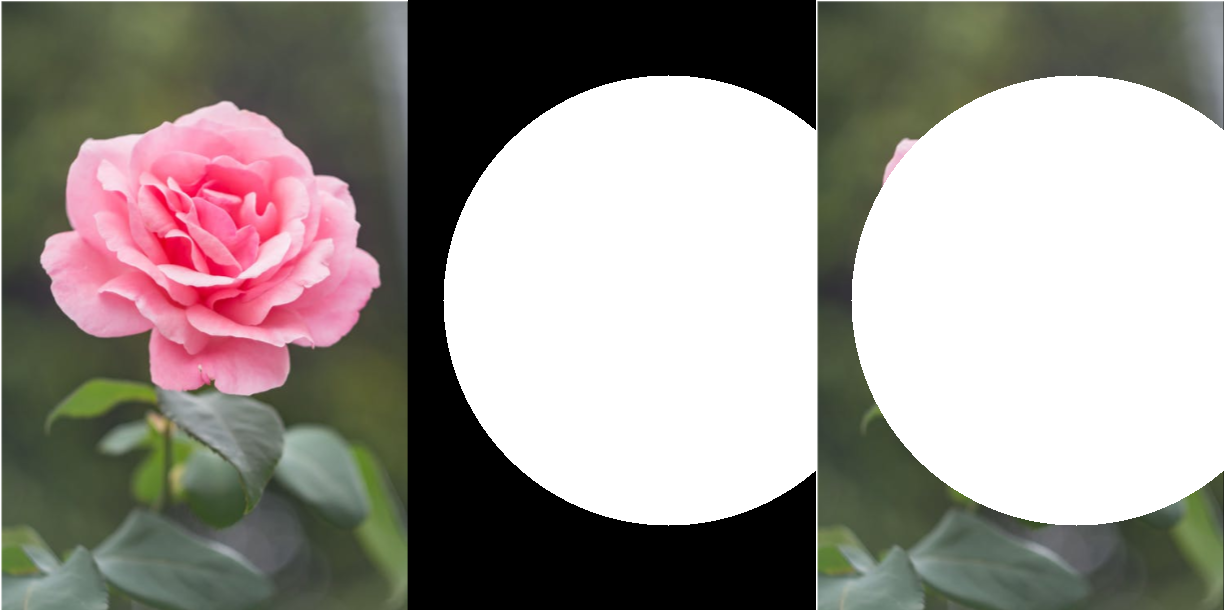

In [14]:
mask = np.zeros(img_rose.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

masked = img_rose | mask

rose_frame = cv.hconcat((img_rose, mask, masked))
cv2_imshow(rose_frame)


NOT

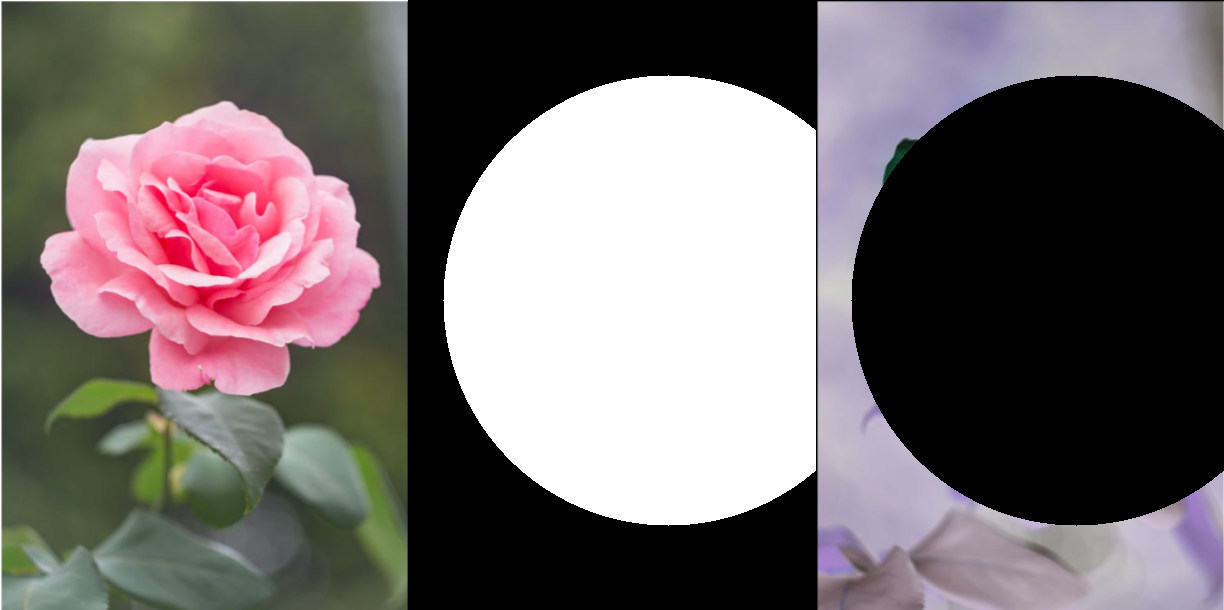

In [15]:
mask = np.zeros(img_rose.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

masked = ~img_rose & ~mask

rose_frame = cv.hconcat((img_rose, mask, masked))
cv2_imshow(rose_frame)

NAND

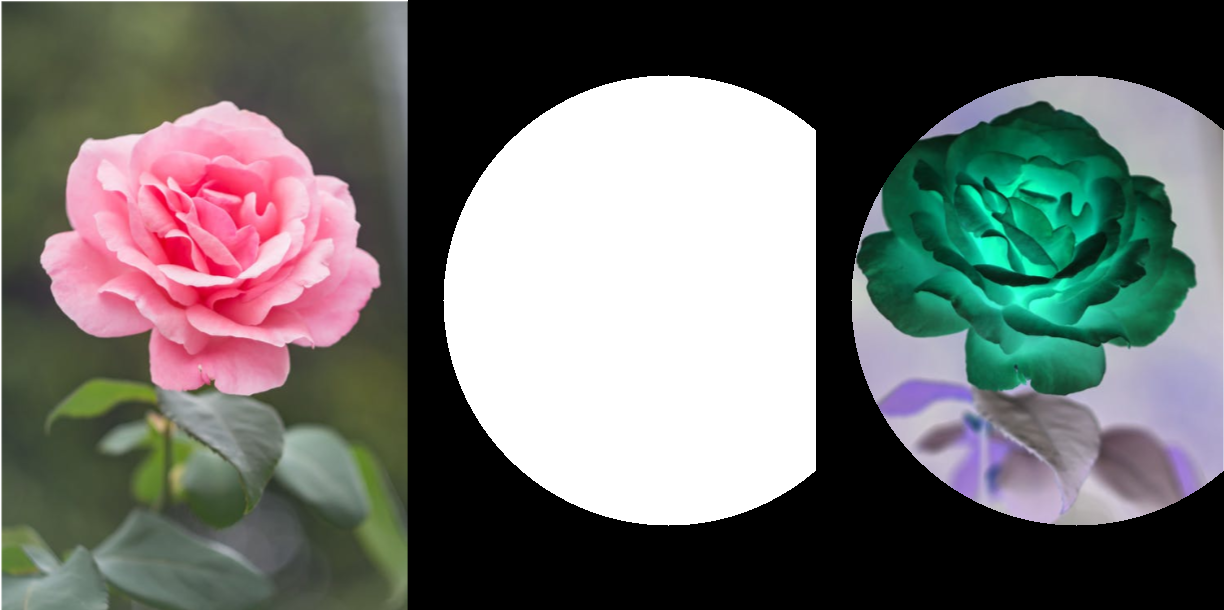

In [16]:
mask = np.zeros(img_rose.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

masked = ~img_rose & mask

rose_frame = cv.hconcat((img_rose, mask, masked))
cv2_imshow(rose_frame)

XOR

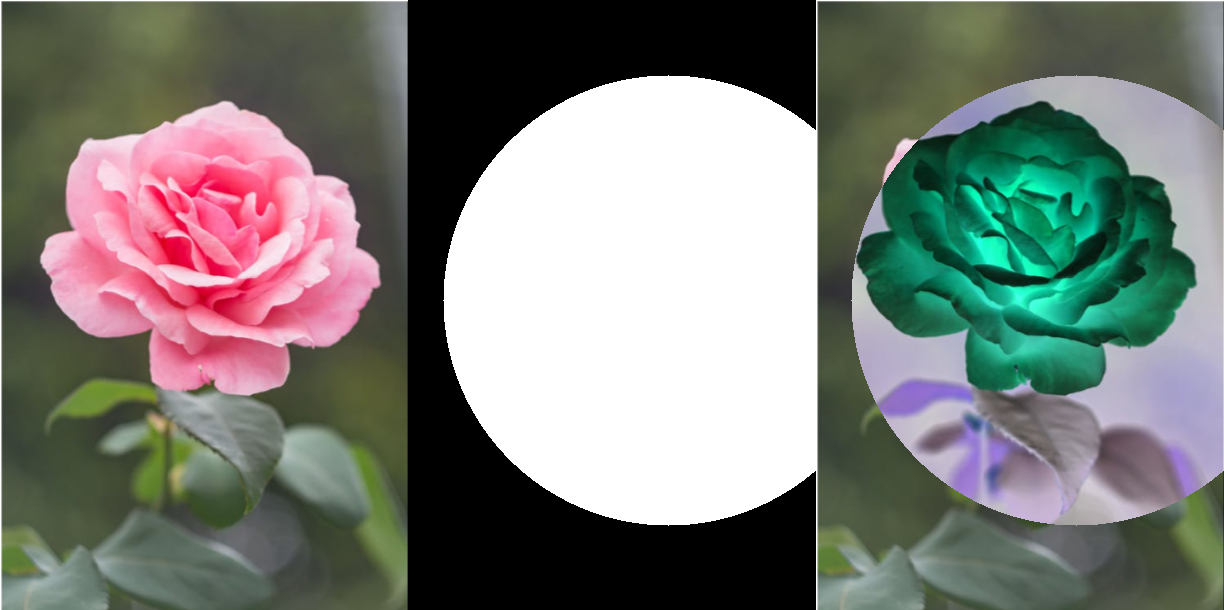

In [17]:
mask = np.zeros(img_rose.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

masked = img_rose ^ mask

rose_frame = cv.hconcat((img_rose, mask, masked))
cv2_imshow(rose_frame)